In [1]:
!pip install yfinance

# The aim is to create stock time series data set free of impurites and train a stage 1 VAE.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
# Read all the ticker yahoo symbols
stdf = pd.read_excel('drive/MyDrive/StockData/Yahoo Ticker Symbols - September 2017.xlsx')

In [ ]:
#Get stockdata of USA, Japan, Germany and China
stdf_for_training = stdf.loc[(stdf['Country']=='USA') | (stdf['Country']=='Japan') | (stdf['Country']=='Germany') | (stdf['Country']=='China')]
stdf_for_testing = stdf.loc[stdf['Country']=='India']

In [ ]:
stdf_for_training.head()

,Ticker,Name,Exchange,Category Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA


In [ ]:
stdf_for_training.shape

(44770, 5)

In [ ]:
stdf_for_testing.head()

,Ticker,Name,Exchange,Category Name,Country
1230,BHARTIARTL.NS,Bharti Airtel Limited,NSI,Wireless Communications,India
1247,ASHOKLEY.NS,Ashok Leyland Limited,NSI,Auto Manufacturers - Major,India
1441,AUROPHARMA.NS,Aurobindo Pharma Limited,NSI,Drugs - Generic,India
1457,AREXMIS.BO,Arex Industries Ltd.,BSE,NaN,India
1586,SANWARIA.NS,Sanwaria Agro Oils Limited,NSI,Farm Products,India


In [ ]:
# Define date range
start_date = "2009-01-01"
end_date = "2023-09-17"

stock_for_training = {} #Put stock data here.

def get_stock_data(stdf_for_training, start_date, end_date,data_len=62):
  tickers = stdf_for_training['Ticker'].tolist()
  count = 1
  true_count = 0
  for ticker in tickers:
    true_count+=1
    try:
      data = yf.download(ticker, start=start_date, end=end_date)
      if len(data)>data_len:
        print('Stock_dowloaded',ticker)
        stock_for_training[ticker] = data
        done = True #Ensure you have complete data_len day stock and listed stock. [[To add only train for high volume stocks so add a post filter after selection while sorting out]]
    except:
      continue

    if(count%100==0):
      print('Saving',ticker,true_count)
      np.save('drive/MyDrive/StockData/stock_for_training.npy', stock_for_training)

    count+=1

    if count>1000:
      break
  np.save('drive/MyDrive/StockData/stock_for_training.npy', stock_for_training)
  return True




In [ ]:
get_stock_data(stdf_for_training, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OEDV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAPL
Stock_dowloaded BAC
Stock_dowloaded AMZN
Stock_dowloaded T


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GOOG
Stock_dowloaded MO
Stock_dowloaded DAL
Stock_dowloaded AA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXP


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded DD
Stock_dowloaded BABA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABT
Stock_dowloaded UA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMAT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMGN
Stock_dowloaded AAL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AIG
Stock_dowloaded ALL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADBE
Stock_dowloaded GOOGL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACN
Stock_dowloaded ABBV


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MT


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LLY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AKAM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NLY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADSK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADM
Stock_dowloaded WBA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARNA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LUV
Stock_dowloaded ACAD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PANW
Stock_dowloaded AMD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AET


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AEP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLMS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVGO
Stock_dowloaded EA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded DB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AEM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APD
Stock_dowloaded AMBA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APOL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NVS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANF
Stock_dowloaded LULU


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARRY
Stock_dowloaded AGNC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JBLU
Stock_dowloaded A


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ORLY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FOLD
Stock_dowloaded AZO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATML']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AZN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AES
Stock_dowloaded GAS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BUD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BDX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACOR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFL
Stock_dowloaded ADI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEGR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACIW
Stock_dowloaded AMP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMTD
Stock_dowloaded AEO


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NVO
Stock_dowloaded ALTR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PAA
Stock_dowloaded ARCC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded AAP



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FAV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NAT
Stock_dowloaded FNMA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AIV
Stock_dowloaded AGIO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AEE
Stock_dowloaded UBS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVXL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARLP
Saving ARLP 100


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANTM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AG
Stock_dowloaded AFSI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATI
Stock_dowloaded ADT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVB
Stock_dowloaded ATW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALNY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARMH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARIA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ASH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANR


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AINV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACXM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACHN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACET


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABMD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ABM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LIFE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATO
Stock_dowloaded ARP


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AON
Stock_dowloaded ADXS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded SAVE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKRX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABAX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AYI
Stock_dowloaded AWH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASML


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALDR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DWA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATRS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARW
Stock_dowloaded ARI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMCC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMC
Stock_dowloaded AL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGEN
Stock_dowloaded AAN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FCAU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BAH


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXAS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALB
Stock_dowloaded AIZ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SAIC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXLL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded CAR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AU


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APH
Stock_dowloaded ANTH


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMDA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMX
Stock_dowloaded AI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABCO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WMC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JKHY
Stock_dowloaded AVAV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALJ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AMKR


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APPY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ERC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANAC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AEIS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: %ticker%FTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MTGE
Stock_dowloaded CENX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASPS
Stock_dowloaded AMRN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMPE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMAG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFFX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ALKS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADES']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACAT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAON


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLRN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded VRSK


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VJET']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded OA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATLS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APTS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Saving APTS 200


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALSK']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALG


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACAS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACTG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RBA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MAA
Stock_dowloaded BAM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATHN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARCO


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANET


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANCX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AF']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AIR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WAB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PKG
Stock_dowloaded CSH


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXDX
Stock_dowloaded AVHI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATHX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARWR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANGI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALSN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALGN
Stock_dowloaded AKBA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGO
Stock_dowloaded AEZS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACRX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ROK


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GLPI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DNI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AZZ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATRC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARRS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARMK


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AOS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANFI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMID


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMCX
Stock_dowloaded ALIM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AHT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SPR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RDEN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded SEE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PAAS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DLPH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADAC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CBL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BBVA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AYR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APOG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANDE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AMSC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMED


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALEX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALCO
Stock_dowloaded ADUS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACTA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACST


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAWW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WMS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PAG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MDRX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded KLIC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ETH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1694923200")')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AZPN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATNY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APRI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AME


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AJG
Stock_dowloaded AIQ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AHGP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGCO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AERI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACRE
Stock_dowloaded ABEO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WAL
Stock_dowloaded SYT


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SHLM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NOG


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HTA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded GIII


Stock_dowloaded DAVE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CVU
Stock_dowloaded BSI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWAY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASTI
Saving ASTI 300


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AREX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANSS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMNB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMBS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIXG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AIN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AHL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AEG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADTN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACLS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ABG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NXJ
Stock_dowloaded KS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HOLI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded GPI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BEAV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXTA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVEO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATHM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AROC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ALX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AER


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RHHBY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ODC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded KAR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HUSA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HIVE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FMS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded DOX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AZUR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded CXW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXS


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVID']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASNA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASGN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARDX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARAY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQXP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded APDN


Stock_dowloaded AMBC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALDW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ALGT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIRM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AIT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIMC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADHD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AEHR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACUR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACHC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACFC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACCO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RPAI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MANH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LAMR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded KYN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATRO


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATNI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARCW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APEI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded AP


Stock_dowloaded ANIK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMTG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ANGO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMSG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMOT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALV


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALOG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AKR


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEGN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZLTQ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ADS.DE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WRLD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded UHAL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded UAMY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SAH
Saving SAH 400


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RJET']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQNM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NAII


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CACC
Stock_dowloaded ATSG


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASEI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARTX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AROW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARCB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMRK
Stock_dowloaded ALRM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGRX
Stock_dowloaded AFAM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACSF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABTL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABGB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABEV
Stock_dowloaded ABCD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAOI
Stock_dowloaded USAP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STFC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STAY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SEED


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RGA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IDSA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded HART


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BREW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AUDC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATRI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATOS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARC
Stock_dowloaded APIC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AOI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AOSL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AMWD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALLY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFOP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AIRI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACGL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACFN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABCB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['REXI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded SAMG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NSAM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded RAIL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MITT
Stock_dowloaded LCM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HASI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GIL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded EAD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATTO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATR
Stock_dowloaded ATNM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASTC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARGS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ARTNA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AOD
Stock_dowloaded AGNCP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADRO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACNB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NTT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NFJ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LNT


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded KALU


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HOMB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HIX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded FAF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EGT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CAAS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BGR
Stock_dowloaded BETR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AUPH


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATLC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AST']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARIS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARCI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APLE
Stock_dowloaded ANY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANIP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMSWA
Saving AMSWA 500


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMSF


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALLT
Stock_dowloaded AKTX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGYS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGTC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADDYY
Stock_dowloaded AAVL


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WAIR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RESI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LFL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded LND


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HRT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ECF


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded DGLY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CIK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CHOP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded CII


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CCD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CADC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AYA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWRE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVNW


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATRM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APPF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMCN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMCF
Stock_dowloaded ALTI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALLE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AJRD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AHH


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGII']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AGM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEPI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AFCB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABCW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ADMA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAME


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SRAQU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded TEO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SINO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded OMAB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NOA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NCZ


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JAGX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ISL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HIO


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GRR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded FAX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded DIT


Stock_dowloaded CRMT


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CRESY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CGA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CAF
Stock_dowloaded ATRA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock_dowloaded ATEN



[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARLZ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ATEC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARII


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARDM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARCX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ARDC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APPS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APHB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANAT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANAD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKAO']: YFTzMissin

Stock_dowloaded AEB
Stock_dowloaded ADPT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACRS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABEOW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABDC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded REX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PAC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NNA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NAUH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IGD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HMNY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GABC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EPAX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ERH


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CACQ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXPW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded BTI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AWF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASUR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASMB
Saving ASMB 600


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASFI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASCMA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASCC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARCP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ARES


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AQMS
Stock_dowloaded ANCB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMRC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMOV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACPW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-0

Stock_dowloaded ABIO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XKE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded VLRS
Stock_dowloaded TEAM


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SORL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NEN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMIA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NEA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JEQ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IGA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IDE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GBAB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FWP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMGE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded EVTC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CADTU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded CHY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BTZ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BAYN.DE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AWP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATAI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARQL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARKR
Stock_dowloaded APP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APLP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMBR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALQA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALOT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKER']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AIB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHPI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGRO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFST']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADGE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ADX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADAT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ADAP


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACTS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACU


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLKAY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded TKC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCOK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AQQSQ


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RZA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PWX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PRTS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['POPE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PEO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OASM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NCV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NADL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NBB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MHF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IOTS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HYB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GAM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded EOD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EAGL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1694923200")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DLA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CBA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRKS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUMAU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AVK


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AUBN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASYS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASA
Stock_dowloaded AMPH


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMIC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMFW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALJJ']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALDX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AGD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEK']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADVS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01

Stock_dowloaded ABUS
Saving AAPC 700


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TANN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHOS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RYAM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RJETQ


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PAHC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NAC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MZA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MGR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HYI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GNOW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FWRD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FEN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FEI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DAI.DE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CHLN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CALI']: YFTzMissingError('$%ticker%: possibly delisted

Stock_dowloaded AXON


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AXGN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVAL
Stock_dowloaded AUMN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASRVP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASBI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ASRV


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ASBB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARTW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APWC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APAM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AMFC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGFS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFGE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADNC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AEMD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ACV


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACBI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABTX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AAMC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded UNAM


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded TVE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded TVC
Stock_dowloaded SGF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCAI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OMAM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded HVCW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NSA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NKG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NAD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTGEP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MPAA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LDP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JRI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JAX']: possibly delisted; no timezone found
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GGM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1694923200")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ETF']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[****************

Stock_dowloaded AXTI
Stock_dowloaded AVXS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUQ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATTU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ATLO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASTE
Stock_dowloaded ASND


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ARL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded APTO


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMTX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGIIL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFMD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFFY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AFB
Stock_dowloaded AEUA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADEP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABIL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WGA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded WIW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SBI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded RKDA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PSF


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NAZ


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MMU


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IPCC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IAF


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IAE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GCP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FNTCU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded FTAI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FGB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FCO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EAA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded EMD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DDAIF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CHI


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CEE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BUI
Stock_dowloaded AXSM
Saving AXSM 808


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANCI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ANOS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALAN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AKZOY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AKO-A


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AJX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGNCB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFSD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEGG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABRN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WRN


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded USA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NZH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded PHX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KLREU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded KYE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JCE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JBR


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JBK


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IGZ']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded IGI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HOPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDRA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GRO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPACU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GER']: YFTzMissin

Stock_dowloaded ELEC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EGIF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNLM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded DYSL


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded CACG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BTA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRSS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLVDW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLVD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUMAW']: YFTzMis

Stock_dowloaded ASKH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AREN


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARCPP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMSGP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRH']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALTX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIMT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AED']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AERG


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADXSW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACLZ']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABAT
Stock_dowloaded AAAP


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WIA


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded WEA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded VKI
Stock_dowloaded TRTL


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SKAS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RUK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded SCD


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROIQ']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['QPACU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AMLH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded PZE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NXZ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded PAI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NMA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded NORD


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NKX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBRV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MOG-A


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MAV
Stock_dowloaded LDF


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JSYNU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded JPI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JBN']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDRAU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GTATQ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPIAW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GGZ


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GGACW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GAI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded GCH


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FNTC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded FBGX


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EXD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded EHI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EAE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded DFP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DDF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNLMR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLVDU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded CLAD
Saving BLVDU 908


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded BHAC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVNU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded BGY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASG


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ANTX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANRZQ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded ANSU


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANDAU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALYI


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALLM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALLB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AIRT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AIC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFFM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZERO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WDI.DE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTLU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded TPZ
Stock_dowloaded ABEC


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded SIEGY


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SDCJF']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROIQW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROIQU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['QPAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PAACR']: YFTzMissingError('$%ticker%: possibly deli

Stock_dowloaded NZF
Stock_dowloaded NVX


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NVG


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NUW


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded NIE


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MYHI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHNB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded LAQ
Stock_dowloaded KED


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HJV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GLV
Stock_dowloaded FIEE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ELECU
Stock_dowloaded EACQU


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNLMU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAMBU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXPWW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ASPN
Stock_dowloaded ARBV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AOGN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AOXY


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALV.DE


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ALOD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AKO-B
Stock_dowloaded AINC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGFSW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFFW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AFCO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AERT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AEGA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ACNV


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABHD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded ABCP


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TANP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TANO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SMCG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SMACU']: YFTzMissingError('$%ticker%: possibly delisted

Stock_dowloaded MLPB


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded MHNC


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHNA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JDD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IMMA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAIC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded HNNA


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HCACU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded GYC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPIA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded GTN-A


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GGACU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GGAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GFY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GDF']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download

Stock_dowloaded FMAO


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FCAM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECACU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EAGLW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EAGLU']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Stock_dowloaded DLYT


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAMBW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVTH']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded BHACU


[*********************100%***********************]  1 of 1 completed


Stock_dowloaded AVOI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AUXO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-01-01 -> 2023-09-17)')


Stock_dowloaded AVGR
Saving AUXO 1008


True

In [ ]:
stock_for_training = np.load('drive/MyDrive/StockData/stock_for_training.npy',allow_pickle='TRUE').item()

In [ ]:
len(stock_for_training.keys())

602

In [ ]:
stock_for_training['AXP']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,18.570000,19.520000,18.400000,19.330000,15.053305,10955700
2009-01-05,19.200001,20.240000,19.000000,19.950001,15.536135,16019200
2009-01-06,20.299999,21.379999,20.010000,21.070000,16.408333,13820200
2009-01-07,20.530001,20.719999,19.830000,20.010000,15.717126,15699900
2009-01-08,19.799999,20.170000,19.400000,20.040001,15.740689,12255100
...,...,...,...,...,...,...
2023-09-11,158.369995,159.160004,157.399994,157.830002,155.730209,2611100
2023-09-12,157.649994,159.720001,157.449997,158.500000,156.391281,2659000
2023-09-13,159.339996,160.699997,158.619995,159.139999,157.022766,2976700


### Clean the data. Ignore data less the time_series_length, Ignore flat lines. Normalize the data

In [ ]:
train_ticker_list = list(stock_for_training.keys())
np.random.shuffle(train_ticker_list)
dow = {'Monday':0,'Tuesday':0.25,'Wednesday':0.5,'Thursday':0.75,'Friday':1}
def get_sample_stock_data(stock_for_training,time_series_length=41):
  done = False
  while not done:

    ticker =train_ticker_list[np.random.randint(0,len(train_ticker_list))]
    data = stock_for_training[ticker]

    start_time=np.random.randint(0,len(data)-time_series_length)
    fdata = data.iloc[start_time:start_time+time_series_length,:].copy()

    max_vol = fdata['Volume'].max()
    max_close = fdata['Close'].max()
    max_open = fdata['Open'].max()
    max_high = fdata['High'].max()
    max_low = fdata['Low'].max()

    min_vol = fdata['Volume'].min()
    min_close = fdata['Close'].min()
    min_open = fdata['Open'].min()
    min_high = fdata['High'].min()
    min_low = fdata['Low'].min()






    if(max_vol==0 or max_close==0 or max_open==0 or max_high==0 or max_low==0): #Ignore flat lines
      done = False
      continue
    else:
      done = True


    if(min_vol==max_vol or min_close==max_close or min_open==max_open or min_high==max_high or min_low==max_low): #Ignore flat lines
      done = False
      continue
    else:
      done = True #Check if all values have same values

    global_price_max = max(max_open,max_close,max_high,max_low) #Calculate the global mean in timeserieslength duration only
    global_price_min = min(min_open,min_close,min_high,min_low)

    #Normalize
    fdata['Open'] = (fdata['Open']-global_price_min)/(global_price_max-global_price_min+0.01)
    fdata['High'] = (fdata['High']-global_price_min)/(global_price_max-global_price_min+0.01)
    fdata['Low'] = (fdata['Low']-global_price_min)/(global_price_max-global_price_min+0.01)
    fdata['Close'] = (fdata['Close']-global_price_min)/(global_price_max-global_price_min+0.01)
    fdata['Volume'] = (fdata['Volume']-min_vol) / (max_vol-min_vol+0.01)

    #Compute differences
    fdata['Open']


  fdata['Day of Week'] = fdata.index.to_series().dt.day_name()
  fdata['Day of Week Num'] = fdata['Day of Week'].map(dow)
  fdata['Day of Month'] = fdata.index.to_series().dt.day/31 #you could have done this while storing the stock na!
  return fdata[['Open','High']].iloc[:-1,:],fdata[['Open','High','Low','Close','Volume','Day of Week Num','Day of Month']].iloc[-5:-1,:],fdata[['Open','High','Low']].iloc[-1,:]

In [ ]:
tseries,weekdata,next_day = get_sample_stock_data(stock_for_training)

In [ ]:
def build_dataset(stock_for_training,num_data=100,time_series_length=41):
  data_for_vae = []
  data_pred_labels = []
  data_week = []
  for i in range(num_data):
    tseries,weekdata,next_day = get_sample_stock_data(stock_for_training,time_series_length)
    data_for_vae.append(tseries.values)

    high_lab = next_day['High']-next_day['Open']
    low_lab = next_day['Low']-next_day['Open']
    data_pred_labels.append([high_lab,low_lab])
    data_week.append(weekdata.values.flatten())

  return data_for_vae,data_pred_labels,data_week

In [ ]:
data_for_vae,data_pred_labels,data_week = build_dataset(stock_for_training,num_data=30000,time_series_length=41) #One time only
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class TimeSeriesDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (list of numpy arrays): Each entry has shape (40, 5) - (time series length, channels).
        """
        self.data = [torch.tensor(d.T, dtype=torch.float32) for d in data]
        # Transpose to (channels, time series length)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Create dataset and dataloader
#dataset = TimeSeriesDataset(data_for_vae) #One time only
#data_for_vae = None

In [ ]:
import pickle
import numpy as np

def save_data_pickle(data, filename):
  """
  Saves data to a file using pickle.

  Args:
    data: The data to be saved.
    filename: The path to the file where the data will be saved.
  """
  with open(filename, 'wb') as f:
    pickle.dump(data, f)

def load_data_pickle(filename):
  """
  Loads data from a file using pickle.

  Args:
    filename: The path to the file containing the data.

  Returns:
    The loaded data.
  """
  with open(filename, 'rb') as f:
    data = pickle.load(f)
  return data




In [ ]:

# # Assuming data_for_vae, data_pred_labels, and data_week are already populated
# # Save all data in Google Drive using pickle
save_data_pickle(data_for_vae, 'drive/MyDrive/StockData/data_for_vae.pkl')
save_data_pickle(data_pred_labels, 'drive/MyDrive/StockData/data_pred_labels.pkl')
save_data_pickle(data_week, 'drive/MyDrive/StockData/data_week.pkl')

In [ ]:
# Example of loading the data back
loaded_data_for_vae = load_data_pickle('drive/MyDrive/StockData/data_for_vae.pkl')
loaded_data_pred_labels = load_data_pickle('drive/MyDrive/StockData/data_pred_labels.pkl')
loaded_data_week = load_data_pickle('drive/MyDrive/StockData/data_week.pkl')

In [ ]:
batch_size = 16
dataset = TimeSeriesDataset(loaded_data_for_vae)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for batch in dataloader:
    print("Batch shape:", batch.shape)  # Expected: (8, 5, 40) -> (batch_size, channels, time series length)
    break

Batch shape: torch.Size([16, 2, 40])


### Use CNN to extract features.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TimeSeriesVAE(nn.Module):
    def __init__(self, input_channels=5, input_length=40, latent_dim=20):
        super(TimeSeriesVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv1d(input_channels, 16, kernel_size=3, stride=2, padding=1),  # (B, 16, 20)
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1),  # (B, 32, 20)
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, stride=2, padding=1),  # (B, 64, 10)
            nn.ReLU()
        )

        # Fully connected layers for latent space
        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(64 * (input_length // 4), latent_dim)  # Mean of latent space
        self.fc_logvar = nn.Linear(64 * (input_length // 4), latent_dim)  # Log-variance of latent space

        # Fully connected layers for decoding
        self.fc_dec = nn.Linear(latent_dim, 64 * (input_length // 4))

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 32, 20)
            nn.ReLU(),
            nn.ConvTranspose1d(32, 16, kernel_size=3, stride=1, padding=1),  # (B, 16, 20)
            nn.ReLU(),
            nn.ConvTranspose1d(16, input_channels, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, input_channels, 40)
            nn.Sigmoid()  # Assuming normalized input data
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std) #Reparametrization trick
        return mu + eps * std

    def forward(self, x):
        # Encode
        x = self.encoder(x)  # (B, 64, 10)
        x = self.flatten(x)  # (B, 64 * 10)
        mu = self.fc_mu(x)  # (B, latent_dim)
        logvar = self.fc_logvar(x)  # (B, latent_dim)

        # Reparameterize
        z = self.reparameterize(mu, logvar)  # (B, latent_dim)

        # Decode
        x_dec = self.fc_dec(z)  # (B, 64 * 10)
        x_dec = x_dec.view(-1, 64, 10)  # Reshape back to (B, 64, 10)
        x_dec = self.decoder(x_dec)  # (B, input_channels, 40)

        return x_dec, mu, logvar

# Instantiate the model
vae = TimeSeriesVAE(input_channels=2, input_length=40, latent_dim=2)

# Example data (batch_size=8, channels=5, length=40)
batch = torch.randn(8, 2, 40)

# Forward pass
x_dec, mu, logvar = vae(batch)

# Outputs
print("Input shape:", batch.shape)  # (8, 5, 40)
print("Decoded output shape:", x_dec.shape)  # (8, 5, 40)
print("Latent mean shape:", mu.shape)  # (8, 20)
print("Latent log-variance shape:", logvar.shape)  # (8, 20)


Input shape: torch.Size([8, 2, 40])
Decoded output shape: torch.Size([8, 2, 40])
Latent mean shape: torch.Size([8, 2])
Latent log-variance shape: torch.Size([8, 2])


In [ ]:
# Define VAE Loss Function
def vae_loss(recon_x, x, mu, logvar):
    """
    Compute the VAE loss: reconstruction + KL divergence.
    Args:
        recon_x: Reconstructed input from the decoder. Shape (batch_size, input_channels, time_steps).
        x: Original input. Shape (batch_size, input_channels, time_steps).
        mu: Latent mean. Shape (batch_size, latent_dim).
        logvar: Latent log-variance. Shape (batch_size, latent_dim).
    Returns:
        Total loss (scalar).
    """
    # Reconstruction loss (use MSE for continuous data)
    recon_loss = nn.MSELoss(reduction='sum')(recon_x, x)

    # KL Divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) #The latent distribution should be near normal

    return recon_loss + kl_loss

In [ ]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(vae.parameters(), lr=0.001)

In [ ]:
vae.train()
num_epochs = 100
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = vae(batch)
        loss = vae_loss(recon, batch, mu, logvar)
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(dataset)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/100, Loss: 4.1893
Epoch 2/100, Loss: 4.0578
Epoch 3/100, Loss: 4.0450
Epoch 4/100, Loss: 4.0544
Epoch 5/100, Loss: 4.0519


KeyboardInterrupt: 

In [ ]:
vae.eval()
with torch.no_grad():
    for batch in dataloader:
        recon, mu, logvar = vae(batch)
        print("Reconstructed shape:", recon.shape)  # Expected: (batch_size, input_channels, time_steps)
        break

Reconstructed shape: torch.Size([16, 2, 40])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
torch.save(vae, 'drive/MyDrive/StockData/vae_model_lat2.pth')

In [ ]:
recon[0].shape

torch.Size([2, 40])

<ipython-input-39-4ceb759ade41>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 16 + 1) instead
  sample_nos = np.random.random_integers(0,16,size=4)


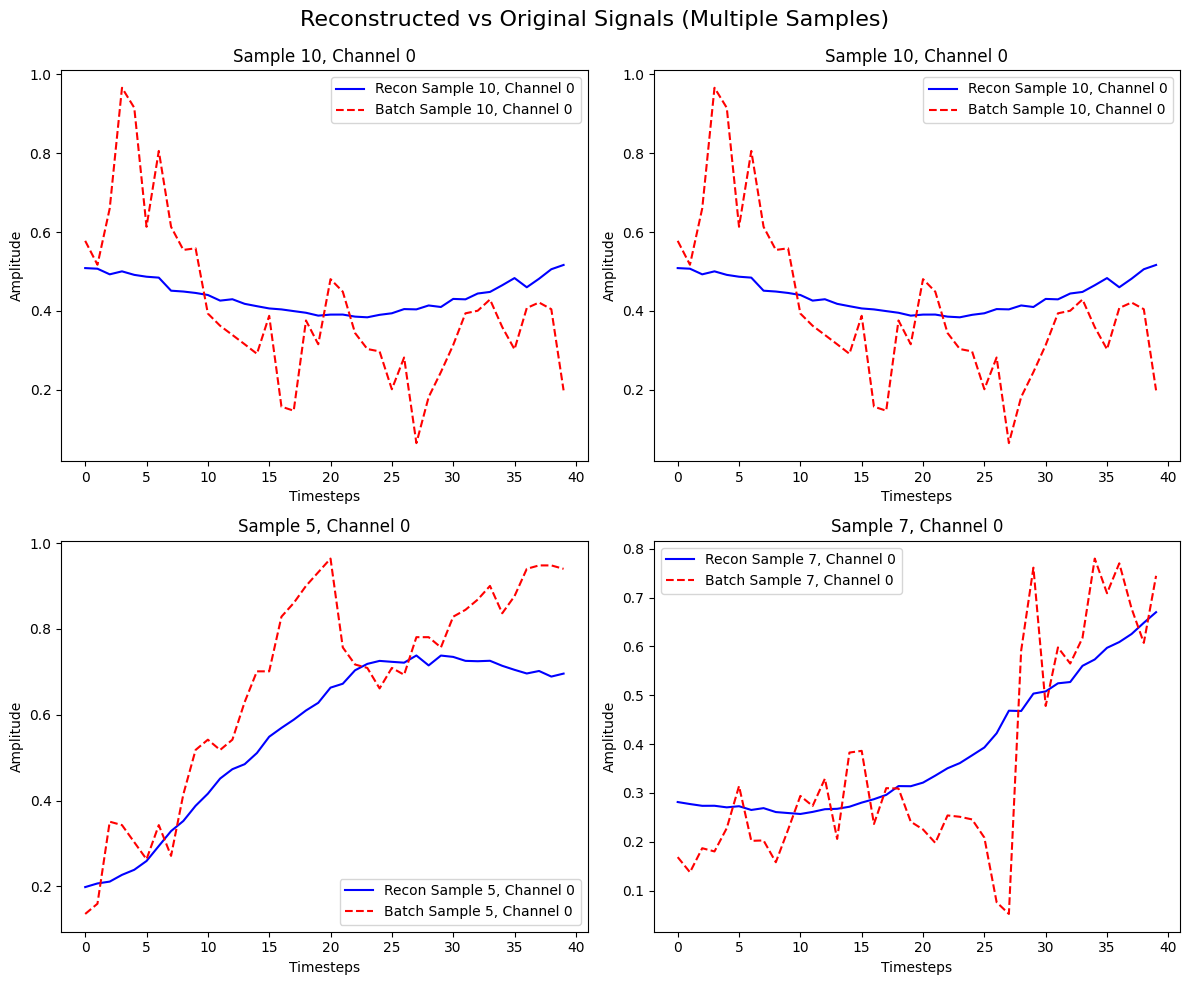

In [ ]:
sample_nos = np.random.random_integers(0,16,size=4)

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2x2 grid for easy indexing

# Colors for recon and batch
colors = ['b', 'r']  # Blue for recon, red for batch

for idx, sample_no in enumerate(sample_nos):
    ax = axes[idx]  # Get the subplot for the current sample

    # Plot channel 0 as an example for the current sample
    ax.plot(recon[sample_no][0], color=colors[0], label=f"Recon Sample {sample_no}, Channel 0")
    ax.plot(batch[sample_no][0], color=colors[1], linestyle='--', label=f"Batch Sample {sample_no}, Channel 0")

    # Add title, legend, and labels
    ax.set_title(f"Sample {sample_no}, Channel 0")
    ax.legend()
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Timesteps")

# Adjust layout and save figure
fig.suptitle("Reconstructed vs Original Signals (Multiple Samples)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for the main title
plt.show()

#fig.savefig('drive/MyDrive/StockData/reconstructed_vs_original_signals_lat5.png', dpi=300, bbox_inches='tight')

### The CNN upconvolve decoder fails to add higher order curvatures. This needs to be replaced by another decoder type

### Ignore below its work in progress

### Now get the detrended patter by subtracting the original dataset by generated one. Which then would be passed to another VAE

In [ ]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm  # Progress bar

def save_residual_dataset(original_dataset, vae_model, save_path, batch_size=8, device="cpu"):
    """
    Generates and saves the residual dataset (original - reconstructed) to disk.

    Args:
        original_dataset (Dataset): The original dataset containing time series data.
        vae_model (torch.nn.Module): The trained VAE model for reconstruction.
        save_path (str): Path to save the residual dataset.
        batch_size (int): Batch size for processing the dataset.
        device (str): Device to perform computations on ("cpu" or "cuda").
    """
    vae_model.eval()  # Set the VAE model to evaluation mode
    batch_size = 16
    dataset = TimeSeriesDataset(loaded_data_for_vae)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    residuals = []  # Placeholder for all residuals
    with tqdm(total=len(dataloader), desc="Generating Residual Dataset", unit="batch") as pbar:
      with torch.no_grad():  # Disable gradient computation
          for batch in dataloader:
              batch = batch.to(device)  # Move to device (GPU/CPU)
              reconstructed, _, _ = vae_model(batch)  # Get reconstructed time series
              residual = batch - reconstructed  # Compute residual
              residuals.append(residual.cpu())  # Move to CPU and append

              pbar.update(1)  # Update progress bar for each batch

    # Combine all residuals into a single tensor
    residual_dataset = torch.cat(residuals, dim=0)  # Shape: (total_samples, channels, timesteps)

    # Save the residual dataset to a file
    torch.save(residual_dataset, save_path)
    print(f"Residual dataset saved to: {save_path}")

# Example usage
save_path = 'drive/MyDrive/StockData/residual_dataset_lat2.pth'
save_residual_dataset(original_dataset=dataset, vae_model=vae, save_path=save_path, device="cpu")


Generating Residual Dataset: 100%|██████████| 1875/1875 [00:03<00:00, 485.95batch/s]


Residual dataset saved to: drive/MyDrive/StockData/residual_dataset_lat2.pth


In [ ]:
loaded_residual_dataset = torch.load('drive/MyDrive/StockData/residual_dataset_lat2.pth')

<ipython-input-42-75be4fcb0187>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_residual_dataset = torch.load('drive/MyDrive/StockData/residual_dataset_lat2.pth')
